In [1]:
import numpy as np
import pandas as pd

In [3]:
column_name = ['user_id', 'item_id','rating','timestamp']
# Import data into df dataframe, this data correlate info with item_it (not the movie name)
df = pd.read_csv('u.data',sep='\t',names=column_name)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
# This dataset connect the item_id with the movie name
movie_title = pd.read_csv('Movie_Id_Titles')

In [8]:
movie_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [9]:
# The .merge() combine dafa frames using a common info. In this case, the item_id was used to connect two datasets into just
# one.
df = pd.merge(df,movie_title,on='item_id')

In [10]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [15]:
# Create a data frame with movie title and the mean of the classiication.
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [16]:
# Adding to this data frame the number of times the movie was watching.
ratings['count'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [17]:
ratings.head(10)

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


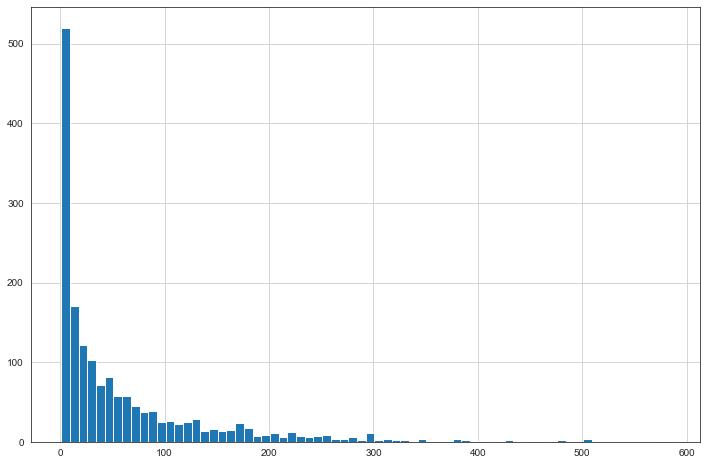

In [19]:
plt.figure(figsize=(12,8))
ratings['count'].hist(bins=70)

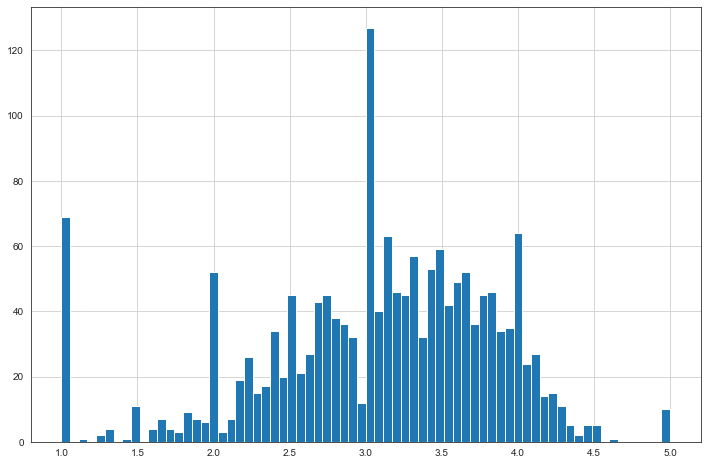

In [20]:
plt.figure(figsize=(12,8))
ratings['rating'].hist(bins=70)

<Figure size 864x576 with 0 Axes>

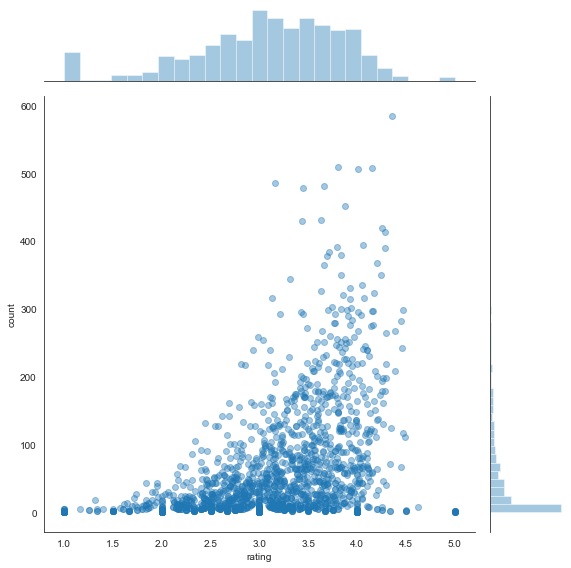

In [24]:
plt.figure(figsize=(12,8))
sns.jointplot(x='rating',y='count',data=ratings,alpha=0.4,height=8)
# This plot is nice to see that commonly the higher rating of movies is correlated with the number of times the movie
# was watched. It makes sense because greater movies have more chance to be watched more times.

In [25]:
moviemat = df.pivot_table(index='user_id', columns= 'title',values='rating')

In [26]:
moviemat.shape

(944, 1664)

In [27]:
ratings.sort_values('count',ascending=False).head()

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [29]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [30]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [31]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [34]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [35]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['correlation'])
corr_liarliar.dropna(inplace = True)
corr_liarliar.head(10)

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918
8 1/2 (1963),0.178064


In [36]:
corr_starwars = corr_starwars.join(ratings['count'])

In [37]:
corr_starwars.head(10)

,correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [40]:
corr_starwars[corr_starwars['count']>100].sort_values('correlation', ascending = False).head(10)
# The idea is observe the correlation between movies and filter the number of times this movie was 
# watched

,correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [41]:
corr_liarliar = corr_liarliar.join(ratings['count'])
corr_liarliar.head(10)

,correlation,count
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [42]:
corr_liarliar[corr_liarliar['count']>100].sort_values('correlation', ascending = False).head(10)
# The idea is observe the correlation between movies and filter the number of times this movie was 
# watched

,correlation,count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
